In [225]:
import pandas as pd

# Strategy
* Figure out what hastags these accounts use
* look at timestamps to see if they're all doing stuff around the same time
* look at if they're automating stuff

# What they do
* Spam cannon: spam out content in specific hashtags
* flood individuals: follow them, unfollow, and targeting them with tweets
* networking: actually befriending people and talking to them about their ideas

# Resources
* [these folks](chrome-extension://oemmndcbldboiebfnladdacbdfmadadm/https://arxiv.org/pdf/1805.10244.pdf) figured out how to detect bots based on how often they retweet each other vs humans
* Since we're not actually looking at bots, this technique may or may not work
* This paper is also iffy for a few reasons: they use a weird physics model, their data is hand-labeled, and they don't define 'bot'.

* [this paper](chrome-extension://oemmndcbldboiebfnladdacbdfmadadm/http://www.people.vcu.edu/~cfung/bib/compromised_accounts_detection-ndss13.pdf) looks more reputable on first glance and is cited by the first paper. Their algorithm is called botOrNot and it' more general: for detecting spammers, hacked account and anomalous behavior.

# TODO:
* scrap legitimate tweets that were made around the same time

In [176]:
# df =  pd.read_csv("data/russia_201901_1_tweets_csv_hashed.csv")

# generate this with bash commands:
# cat ira_tweets_csv_hashed.csv | head -n 1 > random_tweets.csv # gets the labels
# shuf -n 1000 ira_tweets_csv_hashed.csv >> random_tweets.csv
df = pd.read_csv("data/random_tweets.csv")

In [177]:
df.keys()

Index(['tweetid', 'userid', 'user_display_name', 'user_screen_name',
       'user_reported_location', 'user_profile_description',
       'user_profile_url', 'follower_count', 'following_count',
       'account_creation_date', 'account_language', 'tweet_language',
       'tweet_text', 'tweet_time', 'tweet_client_name', 'in_reply_to_tweetid',
       'in_reply_to_userid', 'quoted_tweet_tweetid', 'is_retweet',
       'retweet_userid', 'retweet_tweetid', 'latitude', 'longitude',
       'quote_count', 'reply_count', 'like_count', 'retweet_count', 'hashtags',
       'urls', 'user_mentions', 'poll_choices'],
      dtype='object')

In [178]:
import re 

def has_cyrillic(text):
    return bool(re.search('[а-яА-Я]', text))

In [179]:
tweets = pd.Series([tweet for tweet in df["tweet_text"] if not has_cyrillic(tweet)])
# users = set(users)
tweets[:100][91]

'Grandparents Killed In N.J. Crash While Returning From Easter Egg Hunt  #news'

In [180]:
# Figure out what actually popular hashtags they are using

In [181]:
created_date = pd.to_datetime(df["account_creation_date"])

In [182]:
created_date.head()

0   2013-11-12
1   2015-09-28
2   2013-10-01
3   2014-04-21
4   2014-07-27
Name: account_creation_date, dtype: datetime64[ns]

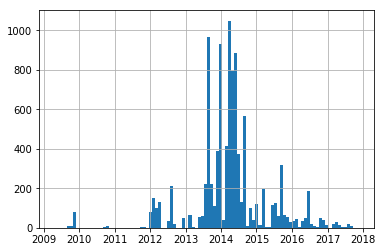

In [183]:
created_date.hist(bins=100)

In [184]:
tags = df["hashtags"].dropna().tolist()

import re

flat_list = []
for sublist in tags:
    sublist = re.findall(r"[\w']+", sublist)
    if type(sublist) == list:
        for tag in sublist:
            assert type(tag) == str
            flat_list.append(tag)
    elif type(sublist) == str:
        flat_list.append(sublist)

hashtags = pd.Series([tag for tag in flat_list if not has_cyrillic(tag)])

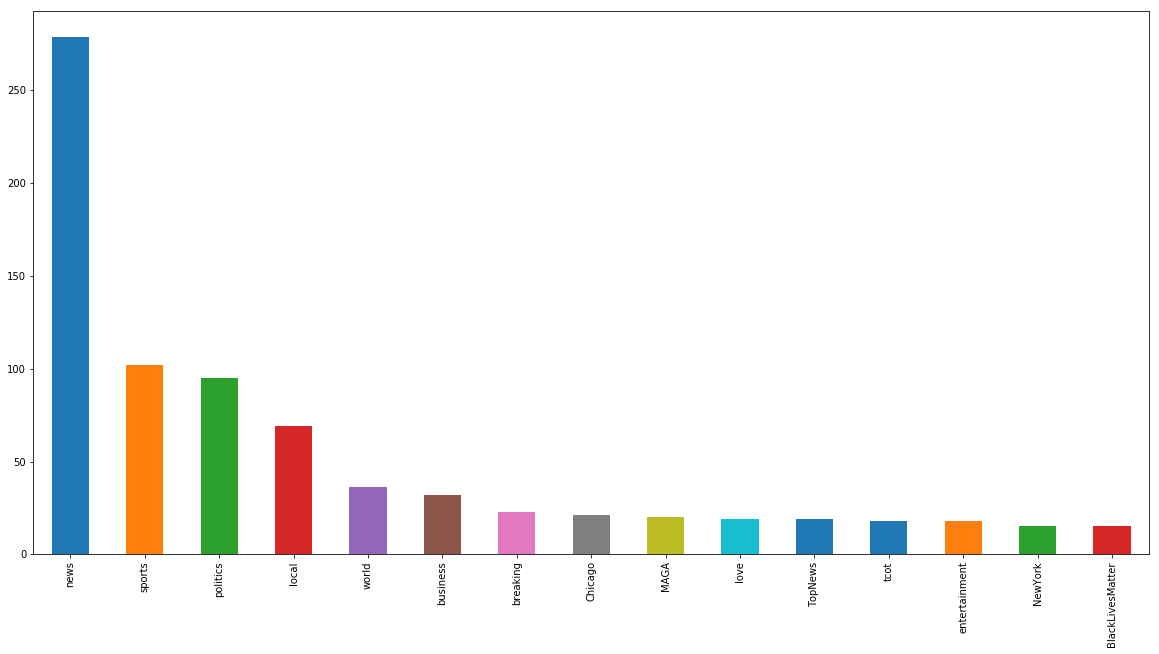

In [227]:
hashtags.value_counts()[:15].plot(kind="bar", figsize=(20, 10))

In [216]:
hashtags.value_counts()[6:26]

breaking              23
Chicago               21
MAGA                  20
love                  19
TopNews               19
tcot                  18
entertainment         18
NewYork               15
BlackLivesMatter      15
health                14
Texas                 14
USA                   14
ColumbianChemicals    14
PJNET                 13
Trump                 13
true                  13
tech                  13
Foke                  13
money                 12
quote                 12
dtype: int64

In [217]:
# hashtags.value_counts(normalize=True).plot(kind="pie", legend=True, figsize=(30, 20))